In [232]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
# importar archivos csv
crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)

C:\Users\alniquia\AppData\Local\Temp\ipykernel_7684\401661502.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)


In [234]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team2    14962
team1    14757
Name: player_team, dtype: int64

In [235]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    14805
team2    14767
draw       147
Name: winner_team, dtype: int64

In [236]:
# agregar columna identificando batallas levelup y definir subset
for i in range(len(crossBattlelog)):

	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

	if  (t1p1 <= 500 or t1p2 <= 500 or t1p3 <= 500 or t2p1 <= 500 or t2p2 <= 500 or t2p3 <= 500):
		crossBattlelog.loc[i, 'low_trophy'] = 'y'
	else:
		crossBattlelog.loc[i, 'low_trophy'] = 'n'

crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n']

crossBattlelog.shape

(19357, 58)

In [237]:
# unificar bases de brawlers
bk1 = crossBattlelog.rename(columns={'battle.team1.player1.brawler.name': 'brawlername'})
bk2 = crossBattlelog.rename(columns={'battle.team1.player2.brawler.name': 'brawlername'})
bk3 = crossBattlelog.rename(columns={'battle.team1.player3.brawler.name': 'brawlername'})
bk4 = crossBattlelog.rename(columns={'battle.team2.player1.brawler.name': 'brawlername'})
bk5 = crossBattlelog.rename(columns={'battle.team2.player2.brawler.name': 'brawlername'})
bk6 = crossBattlelog.rename(columns={'battle.team2.player3.brawler.name': 'brawlername'})

brawler = pd.concat([
bk1[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk2[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk3[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk4[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk5[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk6[['playertag','event.mode','event.map','player_team','brawlername','winner_team']]
], ignore_index=True)

In [238]:
brawler.head()

,playertag,event.mode,event.map,player_team,brawlername,winner_team
0,#YGU20CRG,brawlBall,Sneaky Fields,team1,NITA,team1
1,#YGU20CRG,brawlBall,Sneaky Fields,team2,POCO,team2
2,#YGU20CRG,brawlBall,Sneaky Fields,team2,JACKY,team2
3,#YGU20CRG,brawlBall,Sneaky Fields,team1,NITA,team1
4,#YGU20CRG,brawlBall,Sneaky Fields,team1,NITA,team1


In [239]:
# crear pivot tables
pivotBrawler = brawler.pivot_table(index=['brawlername','player_team','event.mode','event.map'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

In [240]:
# reset indexes
pivotBrawler.reset_index(drop=False, inplace=True)

In [241]:
# agregar columna totales, win y draw
def add_total(df):

	df['total_games'] = df['draw'] + df['team1'] + df['team2']

	for i in range(len(df)):
		df.loc[i, 'total_draws'] = df.loc[i, 'draw']
		if df.loc[i, 'player_team'] == 'team1':
			df.loc[i, 'total_wins'] = df.loc[i, 'team1']
		elif df.loc[i, 'player_team'] == 'team2':
			df.loc[i, 'total_wins'] = df.loc[i, 'team2']
		else:
			print("error en el procedimiento")

add_total(pivotBrawler)

In [242]:
pivotBrawler.head()

winner_team,brawlername,player_team,event.mode,event.map,draw,team1,team2,total_games,total_draws,total_wins
0,8-BIT,team1,bounty,Dry Season,0,2,0,2,0.0,2.0
1,8-BIT,team1,bounty,Hideout,0,3,1,4,0.0,3.0
2,8-BIT,team1,bounty,Shooting Star,0,2,0,2,0.0,2.0
3,8-BIT,team1,brawlBall,Backyard Bowl,0,7,1,8,0.0,7.0
4,8-BIT,team1,brawlBall,Center Stage,0,2,0,2,0.0,2.0


In [243]:
# agrupar y calcular tasa de victoria
pivotBrawler = pivotBrawler[['brawlername','total_games','total_draws','total_wins','event.mode','event.map']].groupby(['brawlername','event.mode','event.map']).sum()
pivotBrawler['winrate'] = pivotBrawler['total_wins'] / pivotBrawler['total_games']

pivotBrawler.head()

winner_team                           total_games  total_draws  total_wins  \
brawlername event.mode event.map                                             
8-BIT       bounty     Dry Season               3          0.0         3.0   
                       Hideout                  5          0.0         4.0   
                       Shooting Star            5          0.0         5.0   
            brawlBall  Backyard Bowl           11          0.0        10.0   
                       Beach Ball               2          0.0         2.0   

winner_team                            winrate  
brawlername event.mode event.map                
8-BIT       bounty     Dry Season     1.000000  
                       Hideout        0.800000  
                       Shooting Star  1.000000  
            brawlBall  Backyard Bowl  0.909091  
                       Beach Ball     1.000000

In [244]:
# reset indexes and sort
pivotBrawler = pivotBrawler.sort_values(by=['brawlername','event.mode','event.map'], ascending=False)

pivotBrawler.reset_index(drop=False, inplace=True)

In [245]:
pivotBrawler[(pivotBrawler['event.mode'] == 'heist') & (pivotBrawler['brawlername'] == 'LOU')]

winner_team,brawlername,event.mode,event.map,total_games,total_draws,total_wins,winrate
673,LOU,heist,Tornado Ring,5,0.0,5.0,1.0
674,LOU,heist,Pit Stop,1,0.0,0.0,0.0
675,LOU,heist,Kaboom Canyon,2,0.0,0.0,0.0
676,LOU,heist,Hot Potato,1,0.0,1.0,1.0


In [246]:
gemGrabMM = pivotBrawler[(pivotBrawler['event.mode']=='gemGrab') & (pivotBrawler['event.map'] == 'Minecart Madness')].sort_values(by='total_games', ascending=False)

In [247]:
#distribución por gamemode
brawlBall = pivotBrawler[(pivotBrawler['event.mode']=='brawlBall')].sort_values(by=['brawlername','event.map'], ascending=False)
gemGrab = pivotBrawler[(pivotBrawler['event.mode']=='gemGrab')].sort_values(by=['brawlername','event.map'], ascending=False)
knockout = pivotBrawler[(pivotBrawler['event.mode']=='knockout')].sort_values(by=['brawlername','event.map'], ascending=False)
hotZone = pivotBrawler[(pivotBrawler['event.mode']=='hotZone')].sort_values(by=['brawlername','event.map'], ascending=False)
heist = pivotBrawler[(pivotBrawler['event.mode']=='heist')].sort_values(by=['brawlername','event.map'], ascending=False)
bounty = pivotBrawler[(pivotBrawler['event.mode']=='bounty')].sort_values(by=['brawlername','event.map'], ascending=False)

In [248]:
brawlBall['total_games'].value_counts()

10     12
1      11
8      10
4      10
7       9
       ..
39      1
426     1
109     1
102     1
161     1
Name: total_games, Length: 181, dtype: int64

In [249]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


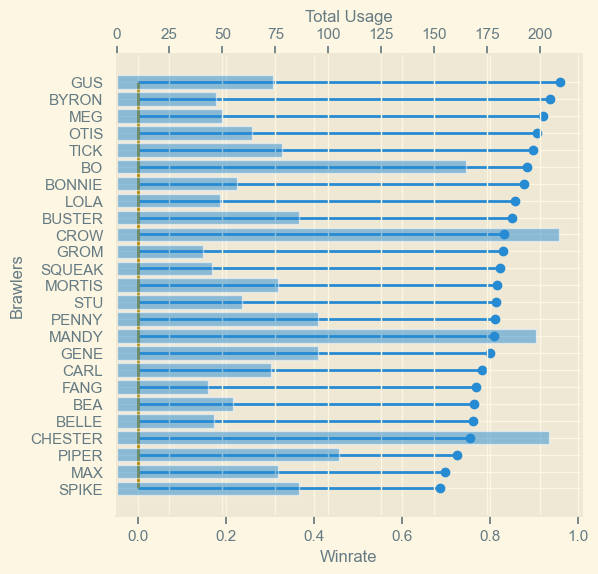

In [250]:
# gráfico gemgrab en minecraft madness

brawlerTop = gemGrabMM[:25]

brawlerTop = brawlerTop.sort_values(by='winrate', ascending=True)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(6, 6))

ay = plt.axes()

ay.stem(brawlerTop['brawlername'], brawlerTop['winrate'], orientation='horizontal')

#plt.yticks(rotation=90)

twin_axes = ay.twiny()

twin_axes.barh(brawlerTop['brawlername'], brawlerTop['total_games'], alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Brawlers')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()

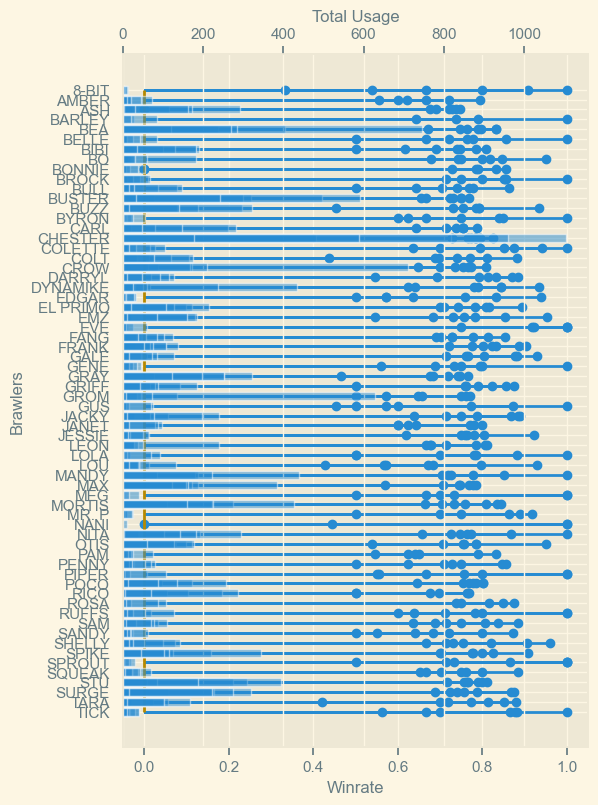

In [251]:
# gráfico gamemode
gamemode = brawlBall[:]

#gamemode = gamemode.sort_values(by='winrate', ascending=True)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(6, 9))

ay = plt.axes()

ay.stem(gamemode['brawlername'], gamemode['winrate'], orientation='horizontal')

#plt.yticks(rotation=90)

twin_axes = ay.twiny()

twin_axes.barh(gamemode['brawlername'], gamemode['total_games'], alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Brawlers')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()

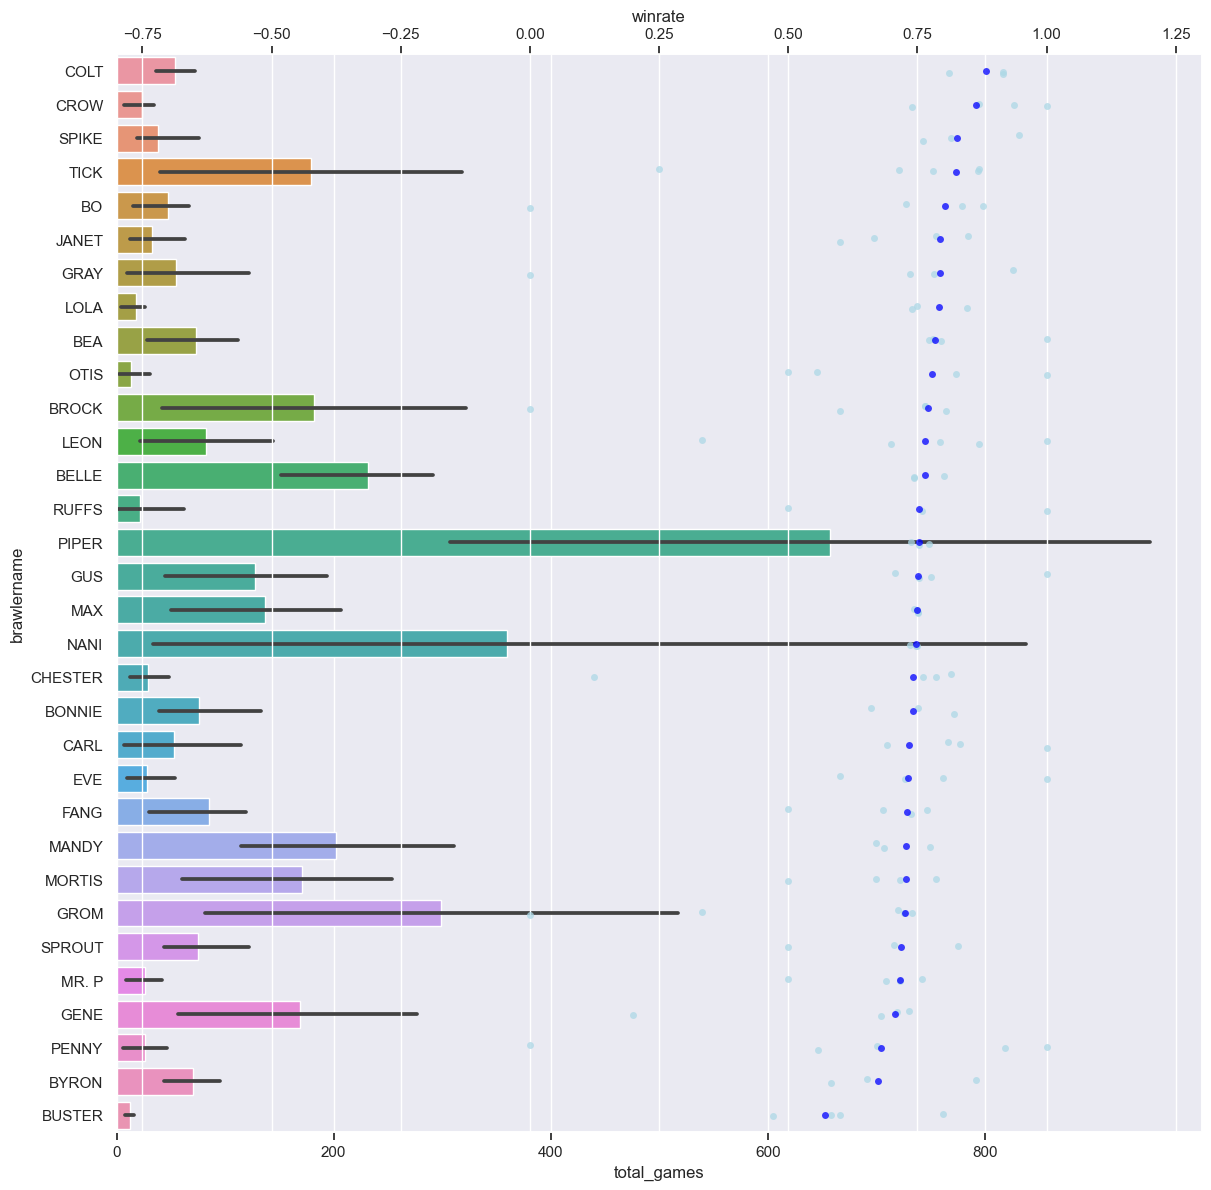

In [276]:
# gráfico gamemode
plt.figure(figsize=(14, 14))

sns.set_theme('notebook')

gamemode = bounty

brawler_winrate = gamemode[['brawlername','total_games','total_wins']].groupby('brawlername').agg(sum)
brawler_winrate['winrate'] = brawler_winrate['total_wins'] / brawler_winrate['total_games']
brawler_winrate['percentile50'] = brawler_winrate['total_games'] / brawler_winrate['total_games'].quantile(0.5)

#maplist = gamemode['event.map'].drop_duplicates()

gamemodeGraph = gamemode.merge(brawler_winrate[brawler_winrate['percentile50'] >= 1], on="brawlername", suffixes=['','_brawler']).sort_values(by='winrate_brawler', ascending=False)

#colorlist = sns.color_palette("Set2")

ay = plt.axes()

sns.barplot(
    data=gamemodeGraph,
    x="total_games", y="brawlername"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(-0.8, 1.3))

sns.stripplot(
    data=gamemodeGraph,
    x="winrate", y="brawlername", color='lightblue', dodge=True, alpha=.75, zorder=1
)

sns.stripplot(
    data=brawler_winrate,
    x="winrate", y="brawlername", color='blue', alpha=.75, zorder=1
)

plt.show()